In [1]:
# import the required library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from scipy.stats.mstats import winsorize
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV



In [2]:
!pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable


# load dataset

In [3]:
# Load the csv of training file
file_path = 'assessment/train_df.csv' 
chunk_size = 10000  # small chunk size for small memory capacity

# Read in chunks
df_iterator = pd.read_csv(file_path, chunksize=chunk_size)

# Process chunks
data_frames = []
for i in df_iterator:
    data_frames.append(i)

# Concatenate all chunks into a single DataFrame
train_df = pd.concat(data_frames, ignore_index=True)

print(train_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351118 entries, 0 to 2351117
Data columns (total 46 columns):
 #   Column   Dtype  
---  ------   -----  
 0   id       int64  
 1   date     int64  
 2   c1       object 
 3   c2       object 
 4   country  object 
 5   c4       object 
 6   city     object 
 7   c6       object 
 8   c7       object 
 9   o1       int64  
 10  region   object 
 11  n1       float64
 12  n2       float64
 13  b1       float64
 14  n3       float64
 15  n4       float64
 16  n5       float64
 17  c9       object 
 18  hour     float64
 19  b2       float64
 20  b3       float64
 21  b4       float64
 22  b5       float64
 23  b6       float64
 24  b7       float64
 25  b8       float64
 26  b9       float64
 27  b10      float64
 28  b11      float64
 29  b12      float64
 30  n6       float64
 31  n7       float64
 32  n8       float64
 33  n9       float64
 34  n10      float64
 35  n11      float64
 36  n12      float64
 37  n13      float64
 38  n1

In [4]:
# Load the csv of prediction file
file_path = 'assessment/pred_df.csv' 
chunk_size = 10000  # small chunk size for small memory capacity

# Read in chunks
df_iterator = pd.read_csv(file_path, chunksize=chunk_size)


data_frames = []
for i in df_iterator:
    data_frames.append(i)

# Concatenate all into a single DataFrame
pred_df = pd.concat(data_frames, ignore_index=True)

print(pred_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587780 entries, 0 to 587779
Data columns (total 45 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       587780 non-null  int64  
 1   date     587780 non-null  int64  
 2   c1       587780 non-null  object 
 3   c2       587780 non-null  object 
 4   country  587780 non-null  object 
 5   c4       587780 non-null  object 
 6   city     587780 non-null  object 
 7   c6       587780 non-null  object 
 8   c7       587780 non-null  object 
 9   o1       587780 non-null  int64  
 10  region   587780 non-null  object 
 11  n1       587780 non-null  float64
 12  n2       587780 non-null  float64
 13  b1       587780 non-null  float64
 14  n3       587780 non-null  float64
 15  n4       587780 non-null  float64
 16  n5       587780 non-null  float64
 17  c9       314135 non-null  object 
 18  hour     583726 non-null  float64
 19  b2       583726 non-null  float64
 20  b3       583726 non-null  

In [5]:
train_df.head()

,id,date,c1,c2,country,c4,city,c6,c7,o1,...,n12,n13,n14,n15,n16,b13,b14,b15,b16,b17
0,1381034,20180418,helpdesk,a,United Kingdom,training,Stalybridge,training,(not set),4,...,0.0,0.0,NaN,0.0,3.804,NaN,NaN,NaN,NaN,0
1,471386,20180515,c,a,United States,(automatic matching),Santa Clara,google,Disp-US-CA-Top-Cities (Content Targeting),1,...,0.0,0.0,0.0,0.0,0.000,NaN,NaN,NaN,NaN,0
2,1867433,20190508,c,a,United Kingdom,usdlt15k,London,google,sqa-youtube-uk,1,...,NaN,0.0,0.0,0.0,0.000,NaN,NaN,NaN,NaN,0
3,2713558,20190325,search-philippines,a,Philippines,zendesk.com,Manila,google-adwords,search-philippines,1,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
4,1545847,20190503,o,a,India,(not provided),Jamshedpur,google,(not set),1,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0


In [6]:
train_df.isna().sum()* 100 / len(train_df) # percentage of null values in each feature

id          0.000000
date        0.000000
c1          0.000000
c2          0.000000
country     0.000000
c4          0.000000
city        0.000000
c6          0.000000
c7          0.000000
o1          0.000000
region      0.000000
n1          0.000000
n2          0.000000
b1          0.000000
n3          0.000000
n4          0.000000
n5          0.000000
c9         46.561423
hour        0.718041
b2          0.718041
b3          0.718041
b4          0.718041
b5          0.718041
b6          0.718041
b7          0.718041
b8          0.718041
b9          0.718041
b10         0.718041
b11         0.718041
b12         0.718041
n6          2.374913
n7          1.505029
n8          4.554386
n9          1.520893
n10         3.924303
n11         2.841882
n12         3.718444
n13         2.365428
n14         4.927018
n15         1.405034
n16        47.753622
b13        92.589015
b14        92.589015
b15        92.589015
b16        92.589015
b17         0.000000
dtype: float64

In [7]:
train_df.drop(columns=['b13','b14','b15','b16'],axis=1,inplace=True) # this columns have 92.59 % missing value

In [8]:
train_df.head(2)

,id,date,c1,c2,country,c4,city,c6,c7,o1,...,n8,n9,n10,n11,n12,n13,n14,n15,n16,b17
0,1381034,20180418,helpdesk,a,United Kingdom,training,Stalybridge,training,(not set),4,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,3.804,0
1,471386,20180515,c,a,United States,(automatic matching),Santa Clara,google,Disp-US-CA-Top-Cities (Content Targeting),1,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000,0


# binary variable handling

In [9]:
# handle binary variables 
def binary_variables(df):
    binary_column = []
    for i in df.columns:
        if i.startswith('b'):
            binary_column.append(i)
    
    for i in binary_column:
        df[i] = np.where(df[i] > 1, 1, df[i])  # replace the values grater than 1 with 1 else return same
        
    return df
binary_variables(train_df)

,id,date,c1,c2,country,c4,city,c6,c7,o1,...,n8,n9,n10,n11,n12,n13,n14,n15,n16,b17
0,1381034,20180418,helpdesk,a,United Kingdom,training,Stalybridge,training,(not set),4,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,3.804,0
1,471386,20180515,c,a,United States,(automatic matching),Santa Clara,google,Disp-US-CA-Top-Cities (Content Targeting),1,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000,0
2,1867433,20190508,c,a,United Kingdom,usdlt15k,London,google,sqa-youtube-uk,1,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.000,0
3,2713558,20190325,search-philippines,a,Philippines,zendesk.com,Manila,google-adwords,search-philippines,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
4,1545847,20190503,o,a,India,(not provided),Jamshedpur,google,(not set),1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351113,565211,20180920,(n),b,United Kingdom,(not set),London,(direct),(not set),2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
2351114,1160681,20190506,o,a,Germany,(not provided),Berlin,google,(not set),14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
2351115,1935601,20180418,(n),a,United States,(not set),Bethlehem,(direct),(not set),1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
2351116,2201174,20190206,(n),a,Netherlands,(not set),Soest,(direct),(not set),1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0


In [10]:
categorical_cols = [col for col in train_df.columns if col.startswith('c')]
ordinal_cols = [col for col in train_df.columns if col.startswith('o')]
numerical_cols = [col for col in train_df.columns if col.startswith('n')]
binary_cols = [col for col in train_df.columns if col.startswith('b') and col != 'b17']

In [11]:
categorical_cols

['c1', 'c2', 'country', 'c4', 'city', 'c6', 'c7', 'c9']

In [12]:
ordinal_cols

['o1']

In [13]:
binary_cols

['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12']

# missing value handling

In [14]:
# handling missing values
def handle_missing_values(df):
    # column types
    
    categorical_cols = [col for col in df.columns if col.startswith('c')]
    ordinal_cols = [col for col in df.columns if col.startswith('o')]
    numerical_cols = [col for col in df.columns if col.startswith('n')]
    binary_cols = [col for col in df.columns if col.startswith('b') and col != 'b17']

    
    # Remove 'Id' and 'b17' from numerical columns 
    if 'Id' in numerical_cols:
        numerical_cols.remove('Id')
    if 'b17' in numerical_cols:
        numerical_cols.remove('b17')
    
    # Create imputers
    numerical_imputer = SimpleImputer(strategy='mean')
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    ordinal_imputer = SimpleImputer(strategy='most_frequent')
    binary_imputer = SimpleImputer(strategy='constant', fill_value=0) # fill value is 0 because majority of data is 0 i.e.  2117860
    
    # c9 is object data type with 46 % of null value
    if 'c9' in categorical_cols:
        df['c9'].fillna('Unknown', inplace=True)  # Impute 'c9' with 'Unknown'
        categorical_cols.remove('c9')  # Remove 'c9' from categorical columns list
    
    # Apply imputers to appropriate columns
    df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])
    df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])
    df[ordinal_cols] = ordinal_imputer.fit_transform(df[ordinal_cols])
    df[binary_cols] = binary_imputer.fit_transform(df[binary_cols])
    
    return df
handle_missing_values(train_df)

,id,date,c1,c2,country,c4,city,c6,c7,o1,...,n8,n9,n10,n11,n12,n13,n14,n15,n16,b17
0,1381034,20180418,helpdesk,a,United Kingdom,training,Stalybridge,training,(not set),4,...,0.0,0.0,0.0,0.000000,0.000000,0.0,8.10258,0.0,3.804000,0
1,471386,20180515,c,a,United States,(automatic matching),Santa Clara,google,Disp-US-CA-Top-Cities (Content Targeting),1,...,0.0,0.0,0.0,0.596857,0.000000,0.0,0.00000,0.0,0.000000,0
2,1867433,20190508,c,a,United Kingdom,usdlt15k,London,google,sqa-youtube-uk,1,...,0.0,0.0,0.0,0.000000,0.667949,0.0,0.00000,0.0,0.000000,0
3,2713558,20190325,search-philippines,a,Philippines,zendesk.com,Manila,google-adwords,search-philippines,1,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,100.831057,0
4,1545847,20190503,o,a,India,(not provided),Jamshedpur,google,(not set),1,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,100.831057,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351113,565211,20180920,(n),b,United Kingdom,(not set),London,(direct),(not set),2,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,100.831057,0
2351114,1160681,20190506,o,a,Germany,(not provided),Berlin,google,(not set),14,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,100.831057,0
2351115,1935601,20180418,(n),a,United States,(not set),Bethlehem,(direct),(not set),1,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,100.831057,0
2351116,2201174,20190206,(n),a,Netherlands,(not set),Soest,(direct),(not set),1,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,100.831057,0


In [15]:
# check the null values after handling it
train_df.isna().sum()* 100 / len(train_df)

id         0.000000
date       0.000000
c1         0.000000
c2         0.000000
country    0.000000
c4         0.000000
city       0.000000
c6         0.000000
c7         0.000000
o1         0.000000
region     0.000000
n1         0.000000
n2         0.000000
b1         0.000000
n3         0.000000
n4         0.000000
n5         0.000000
c9         0.000000
hour       0.718041
b2         0.000000
b3         0.000000
b4         0.000000
b5         0.000000
b6         0.000000
b7         0.000000
b8         0.000000
b9         0.000000
b10        0.000000
b11        0.000000
b12        0.000000
n6         0.000000
n7         0.000000
n8         0.000000
n9         0.000000
n10        0.000000
n11        0.000000
n12        0.000000
n13        0.000000
n14        0.000000
n15        0.000000
n16        0.000000
b17        0.000000
dtype: float64

In [16]:
# null value is succefully handled

In [17]:
# Convert 'date' to datetime
train_df['date'] = pd.to_datetime(train_df['date'], unit='s')

In [18]:
train_df['date'] 

0         1970-08-22 13:40:18
1         1970-08-22 13:41:55
2         1970-08-22 16:28:28
3         1970-08-22 16:25:25
4         1970-08-22 16:28:23
                  ...        
2351113   1970-08-22 13:48:40
2351114   1970-08-22 16:28:26
2351115   1970-08-22 13:40:18
2351116   1970-08-22 16:23:26
2351117   1970-08-22 13:36:44
Name: date, Length: 2351118, dtype: datetime64[ns]

# Correlation Analysis

In [19]:
# Calculate the correlation matrix for numerical features
correlation_matrix = train_df.corr()
correlation_matrix

,id,o1,n1,n2,b1,n3,n4,n5,hour,b2,...,n8,n9,n10,n11,n12,n13,n14,n15,n16,b17
id,1.000000,0.000268,-0.001282,0.000548,-0.001142,0.000380,0.000532,-0.000637,0.000200,0.000127,...,0.000036,-0.000574,-0.000444,-0.000732,0.000205,-0.000186,0.000990,0.000227,0.000245,0.001721
o1,0.000268,1.000000,0.142516,0.101027,-0.272960,0.108011,0.071779,0.212740,-0.008359,0.046141,...,0.003682,0.021702,0.010452,0.007445,-0.000208,0.010566,0.014068,0.001524,0.066075,0.040088
n1,-0.001282,0.142516,1.000000,0.087942,0.015340,0.141862,-0.047667,0.837983,-0.003947,0.063939,...,-0.005817,-0.017621,0.013556,0.029051,-0.007032,0.011497,-0.034147,-0.011751,-0.000206,-0.022159
n2,0.000548,0.101027,0.087942,1.000000,-0.093269,0.907773,0.550468,0.348162,0.002483,0.022833,...,0.051231,0.112600,0.093422,0.041250,0.061197,0.156748,0.178594,0.106580,0.454616,0.065219
b1,-0.001142,-0.272960,0.015340,-0.093269,1.000000,-0.080783,-0.104195,-0.076103,0.027531,-0.039597,...,-0.000840,-0.041281,-0.008395,-0.002481,0.002433,-0.006458,-0.030022,-0.007685,-0.092576,-0.101786
n3,0.000380,0.108011,0.141862,0.907773,-0.080783,1.000000,0.552604,0.379359,0.001759,0.045115,...,0.040325,0.110507,0.105520,0.050644,0.070230,0.140854,0.176390,0.090975,0.475753,0.051683
n4,0.000532,0.071779,-0.047667,0.550468,-0.104195,0.552604,1.000000,0.163907,0.001685,0.033400,...,0.065886,0.209287,0.138381,0.074215,0.108286,0.084801,0.347630,0.192818,0.864029,0.068278
n5,-0.000637,0.212740,0.837983,0.348162,-0.076103,0.379359,0.163907,1.000000,-0.004602,0.097769,...,0.015938,0.033953,0.038767,0.060343,0.005465,0.036036,0.041225,0.014820,0.134343,0.028424
hour,0.000200,-0.008359,-0.003947,0.002483,0.027531,0.001759,0.001685,-0.004602,1.000000,0.018960,...,-0.001608,0.000163,0.003618,0.006511,-0.001413,0.009359,0.001477,0.000177,-0.003316,0.008536
b2,0.000127,0.046141,0.063939,0.022833,-0.039597,0.045115,0.033400,0.097769,0.018960,1.000000,...,0.012484,-0.005711,0.026101,0.065102,0.002313,0.029962,-0.005257,-0.001202,-0.010929,-0.011089


The target variable b17 shows  weak correlations with most features, indicating that no single feature has a strong linear 
relationship with the target
the highest correlation is b10 with 0.110819 weak positive correlation.

High Correlations Between Features:

1. n2 and n3 show a very high correlation 0.907773, suggesting they may contain redundant/NOT NEEDED information.
2. n16 has high correlations with n2 0.454616, n3 0.475753, and n4 0.864029. This indicates these numerical features are st rongly related and may contribute similar information to the model.
3. n4 and n16 have a correlation of 0.864029, indicating that n4 and n16 are almost collinear.

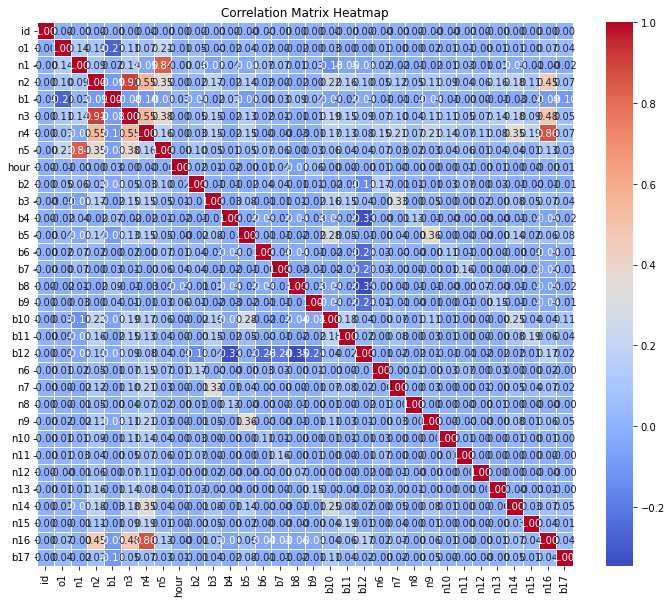

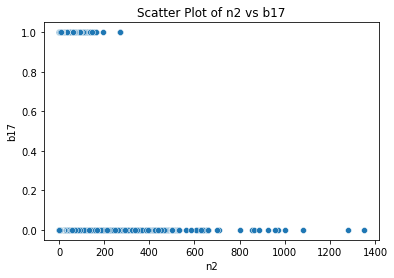

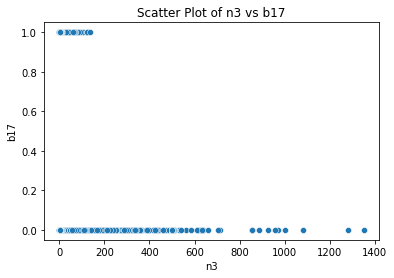

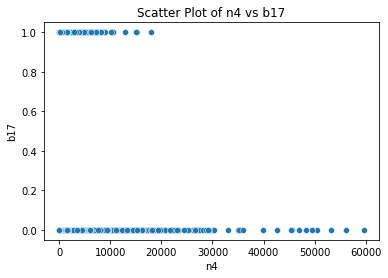

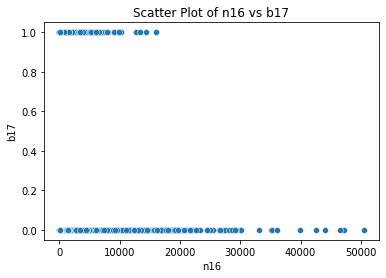

In [20]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



# Scatter plots for the highly correlated features with the target variable
high_corr_with_target = ['n2', 'n3', 'n4', 'n16']
for feature in high_corr_with_target:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=train_df, x=feature, y='b17', palette='coolwarm')
    plt.title(f'Scatter Plot of {feature} vs b17')
    plt.show()


difficult to find any clear pattern or separation directly from this plot.

# handling class imbalance
with lightgbm class_weight parameter 

after initialize class_weight there is slight improvment in f1 score

In [ ]:
# Analyze class imbalance
class_counts = train_df['b17'].value_counts()
class_proportions = train_df['b17'].value_counts(normalize=True)

print("Class Counts:\n", class_counts)
print("\nClass Proportions:\n", class_proportions)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='b17', data=train_df, palette='coolwarm')
plt.title('Class Distribution of Target Variable (b17)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# outlier handling 
due to less time use the robust winsorize to handle the outlier

In [22]:
def handle_outliers(df, columns):
    "Handle outliers using Winsorization"
    
    for col in columns:
        df[col] = winsorize(df[col], limits=[0.05, 0.05])  # Winsorize at 5th and 95th percentile remove outlier present 
                                                           # in extreme level
    return df
handle_outliers(train_df,numerical_cols)

,id,date,c1,c2,country,c4,city,c6,c7,o1,...,n8,n9,n10,n11,n12,n13,n14,n15,n16,b17
0,1381034,1970-08-22 13:40:18,helpdesk,a,United Kingdom,training,Stalybridge,training,(not set),4,...,0.0,0.0,0.0,0.0,0.000000,0.0,8.10258,0.0,3.804000,0
1,471386,1970-08-22 13:41:55,c,a,United States,(automatic matching),Santa Clara,google,Disp-US-CA-Top-Cities (Content Targeting),1,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0
2,1867433,1970-08-22 16:28:28,c,a,United Kingdom,usdlt15k,London,google,sqa-youtube-uk,1,...,0.0,0.0,0.0,0.0,0.667949,0.0,0.00000,0.0,0.000000,0
3,2713558,1970-08-22 16:25:25,search-philippines,a,Philippines,zendesk.com,Manila,google-adwords,search-philippines,1,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,100.831057,0
4,1545847,1970-08-22 16:28:23,o,a,India,(not provided),Jamshedpur,google,(not set),1,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,100.831057,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351113,565211,1970-08-22 13:48:40,(n),b,United Kingdom,(not set),London,(direct),(not set),2,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,100.831057,0
2351114,1160681,1970-08-22 16:28:26,o,a,Germany,(not provided),Berlin,google,(not set),14,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,100.831057,0
2351115,1935601,1970-08-22 13:40:18,(n),a,United States,(not set),Bethlehem,(direct),(not set),1,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,100.831057,0
2351116,2201174,1970-08-22 16:23:26,(n),a,Netherlands,(not set),Soest,(direct),(not set),1,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,100.831057,0


The Winsorization technique modifies the data by limiting extreme values, but it does not remove rows. 
Instead, it transforms extreme values to be within a specified range, thus reducing the effect of outliers without 
changing the number of rows.

In [23]:
def normalize_numeric(df, columns):
    " Normalize numerical columns using StandardScaler "
    
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df
normalize_numeric(train_df,numerical_cols)

,id,date,c1,c2,country,c4,city,c6,c7,o1,...,n8,n9,n10,n11,n12,n13,n14,n15,n16,b17
0,1381034,1970-08-22 13:40:18,helpdesk,a,United Kingdom,training,Stalybridge,training,(not set),4,...,-0.237419,0.0,0.0,0.0,-0.233034,0.0,3.102056,0.0,-1.104472,0
1,471386,1970-08-22 13:41:55,c,a,United States,(automatic matching),Santa Clara,google,Disp-US-CA-Top-Cities (Content Targeting),1,...,-0.237419,0.0,0.0,0.0,-0.233034,0.0,-0.329278,0.0,-1.172092,0
2,1867433,1970-08-22 16:28:28,c,a,United Kingdom,usdlt15k,London,google,sqa-youtube-uk,1,...,-0.237419,0.0,0.0,0.0,4.308790,0.0,-0.329278,0.0,-1.172092,0
3,2713558,1970-08-22 16:25:25,search-philippines,a,Philippines,zendesk.com,Manila,google-adwords,search-philippines,1,...,-0.237419,0.0,0.0,0.0,-0.233034,0.0,-0.329278,0.0,0.620294,0
4,1545847,1970-08-22 16:28:23,o,a,India,(not provided),Jamshedpur,google,(not set),1,...,-0.237419,0.0,0.0,0.0,-0.233034,0.0,-0.329278,0.0,0.620294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351113,565211,1970-08-22 13:48:40,(n),b,United Kingdom,(not set),London,(direct),(not set),2,...,-0.237419,0.0,0.0,0.0,-0.233034,0.0,-0.329278,0.0,0.620294,0
2351114,1160681,1970-08-22 16:28:26,o,a,Germany,(not provided),Berlin,google,(not set),14,...,-0.237419,0.0,0.0,0.0,-0.233034,0.0,-0.329278,0.0,0.620294,0
2351115,1935601,1970-08-22 13:40:18,(n),a,United States,(not set),Bethlehem,(direct),(not set),1,...,-0.237419,0.0,0.0,0.0,-0.233034,0.0,-0.329278,0.0,0.620294,0
2351116,2201174,1970-08-22 16:23:26,(n),a,Netherlands,(not set),Soest,(direct),(not set),1,...,-0.237419,0.0,0.0,0.0,-0.233034,0.0,-0.329278,0.0,0.620294,0


In [24]:
train_df['region'] = train_df['region'].astype('category')
pred_df['region'] = pred_df['region'].astype('category')

In [27]:
pred_df.drop(columns=['b13','b14', 'b15','b16'],inplace=True) # droped on first excution KeyError: "['b13', 'b14', 'b15'] not found in axis"


In [28]:
pred_df.shape

(587780, 41)

# training of model

In [29]:
# Prepare the data for modeling
X = train_df.drop(columns=['b17', 'date', 'id'])
y = train_df['b17']

# Convert categorical columns to category data type
for col in categorical_cols:
    X[col] = X[col].astype('category')
    
# Calculate class weights this is taken in to consideration beacuse dataset is highly imbalanced
total = y.count()
class_weights = {0: 1, 1: total / (2 * y.sum())}
print(f"Class Weights: {class_weights}")
    
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# LightGBM model
model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary',  early_stopping_rounds=100, random_state=42,class_weight=class_weights)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='f1',categorical_feature=categorical_cols)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
f1 = f1_score(y_val, y_pred)
print(f'Validation F1 Score: {f1}')



Class Weights: {0: 1, 1: 50.500859180341955}
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 18622, number of negative: 1862272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.318241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11020
[LightGBM] [Info] Number of data points in the train set: 1880894, number of used features: 32
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [bi

# prediction on pred_df 

In [31]:
# If you want to save the model for future use
import joblib
joblib.dump(model, 'lightgbm_model.pkl')

# Make predictions on the prediction dataset
pred_df = handle_missing_values(pred_df)  # Handle missing values in prediction data
pred_df = binary_variables(pred_df)  # Handle binary variables in prediction data
pred_df = handle_outliers(pred_df, numerical_cols)  # Handle outliers in prediction data
pred_df = normalize_numeric(pred_df, numerical_cols)  # Normalize prediction data

# Convert categorical columns to category data type in prediction data
for col in categorical_cols:
    pred_df[col] = pred_df[col].astype('category')

X_pred = pred_df.drop(columns=['date','id'])
# print(X_pred)

# Load the model and predict
model = joblib.load('lightgbm_model.pkl')
predictions = model.predict(X_pred)
print(predictions)
# Create a new DataFrame with only 'id' and 'b17' columns
submission_df = pred_df[['id']].copy()
submission_df['b17'] = predictions

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

[0 1 0 ... 1 0 0]


# hyperparameter tuning
### Due to less memory and preprocessing power cant load the tuned model i.e.  for KeyboardInterrupt                         

In [32]:
# Define the hyperparameter space
param_dist = {
    'max_depth': np.random.randint(3, 20, 10),
    'num_leaves': np.random.randint(10, 500, 10),
    'min_child_samples': np.random.randint(5, 100, 10),
    'reg_alpha': np.random.uniform(0, 1, 10),
    'reg_lambda': np.random.uniform(0, 1, 10),
    'colsample_bytree': np.random.uniform(0.5, 1, 10),
    'subsample': np.random.uniform(0.5, 1, 10),
    'learning_rate': np.random.uniform(0.01, 0.5, 10),
    'n_estimators': np.random.randint(100, 1000, 10)
}

# Create the LightGBM model
model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42, class_weight=class_weights)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1, verbose=1, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', random_search.best_params_)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_model.predict(X_val)
f1 = f1_score(y_val, y_pred)
print(f'Validation F1 Score (best model): {f1}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

# Tuning of lgb
Due to less memory and preprocessing power cant load the tuned model
so interrupt the kernel after approximatly 1 + hour

In [ ]:
param_dist = {
    'max_depth': np.random.randint(3, 20, 10),
    'num_leaves': np.random.randint(10, 500, 10),
    'min_child_samples': np.random.randint(5, 100, 10),
    'reg_alpha': np.random.uniform(0, 1, 10),
    'reg_lambda': np.random.uniform(0, 1, 10),
    'colsample_bytree': np.random.uniform(0.5, 1, 10),
    'subsample': np.random.uniform(0.5, 1, 10),
    'learning_rate': np.random.uniform(0.01, 0.5, 10),
    'n_estimators': np.random.randint(100, 1000, 10)
}

In [ ]:
model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42, class_weight=class_weights)

In [ ]:
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1, verbose=1, random_state=42)

In [ ]:
random_search.fit(X_train, y_train)

In [ ]:
print('Best hyperparameters:', random_search.best_params_)
best_model = random_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_val)
f1 = f1_score(y_val, y_pred)
print(f'Validation F1 Score (best model): {f1}')

In [ ]:
# optuna hyperparameter tuning is also great output in lgb we can compare the best model of optuna study with
# RandomizedSearchCVS

In [ ]:
# # comments
# I also trained the model with random forest also but system get crashed as i encoded the data set with
# one hot encoding and lebel encoding this create huge dataset so system get crashed and give memory error
# this is the main reason to select the lightgbm  LightGBM is designed to be memory-efficient, especially when dealing 
# with large datasets
# Both are enseble learning algorthim with it is worth noting that both algorithms have their strengths and weaknesses,
# and the best choice often depends on the specific requirements of the problem.